In [1]:
#Loading the dataset

import pandas as pd

athletes = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-27/athlete_events.csv")

countries = pd.read_csv("https://raw.githubusercontent.com/google/dspl/master/samples/google/canonical/countries.csv")

## **SECTION ONE: Matplotlib**

#### 1. __Plot a bar graph of the top 5 countries with the highest number of athletes. Display the athlete count value on top of each bar.__

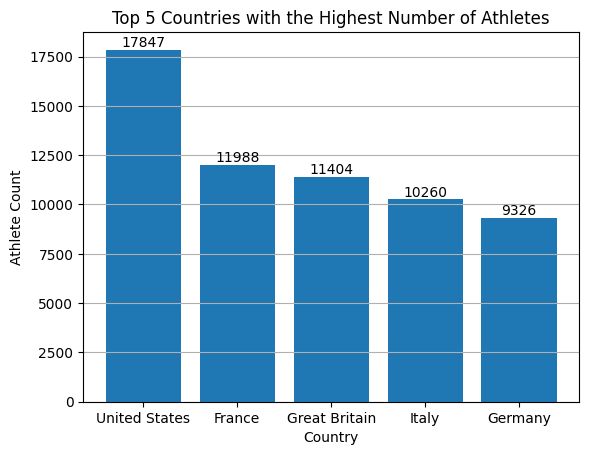

In [2]:
#Importing matplotlib
import matplotlib.pyplot as plt

#preparing plotting dataframe
top_5_countries = athletes.Team.value_counts().head(5)

#plotting
fig = plt.bar(top_5_countries.index, top_5_countries.values)

# Adding values on top of each bar
for bar in fig:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')


plt.xlabel('Country')
plt.ylabel('Athlete Count')
plt.title('Top 5 Countries with the Highest Number of Athletes')
plt.grid(axis="y")

plt.show()

#### 2. **Create a bar chart showing athlete counts by season (Summer and Winter). Set y-axis ticks from 0 to max count in steps of 5000. Assign summer the color turquoise and winter the color cyan. Set alpha=0.5 for transparency.**

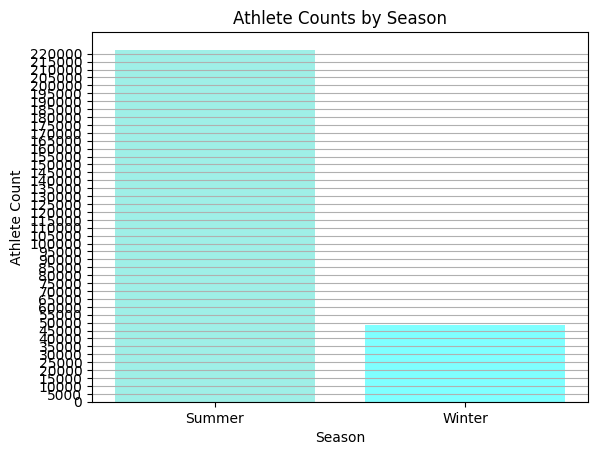

In [3]:
#preparing the dataframe
count_by_season = athletes.Season.value_counts()

#plotting
plt.bar(count_by_season.index, count_by_season.values, color=['turquoise', 'cyan'], alpha=0.5)
plt.xlabel('Season')
plt.ylabel('Athlete Count')
plt.title('Athlete Counts by Season')
plt.grid(axis="y")
plt.yticks(range(0, count_by_season.max(), 5000))
plt.show()

#### 3. __Create a stacked bar chart where each bar represents a type of medal (Gold, Silver, Bronze), and the height of each bar shows the total number of times that medal was won. Each bar should be divided (stacked) by gender to show how many of those medals were won by male and female athletes. Move the legend to the right, outside the plot.__

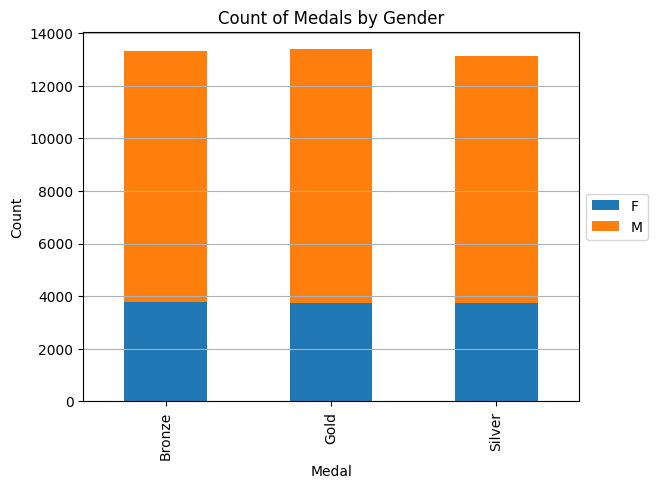

In [4]:
#preparing the dataframe
count_by_models = athletes.groupby(['Medal', 'Sex']).size().unstack()

#plotting
count_by_models.plot(kind='bar', stacked=True)
plt.grid(axis="y")
plt.xlabel('Medal')
plt.ylabel('Count')
plt.title('Count of Medals by Gender')

#Placing the legend to the right, autside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#### 4. __Plot a scatterplot of weight (y-axis) against age(x-axis) of athletes. Add a vertical line at age 25 to split "younger" vs "older" athletes. Add a horizontal line at weight=70 to mark a reference threshold. Annotate both lines.__

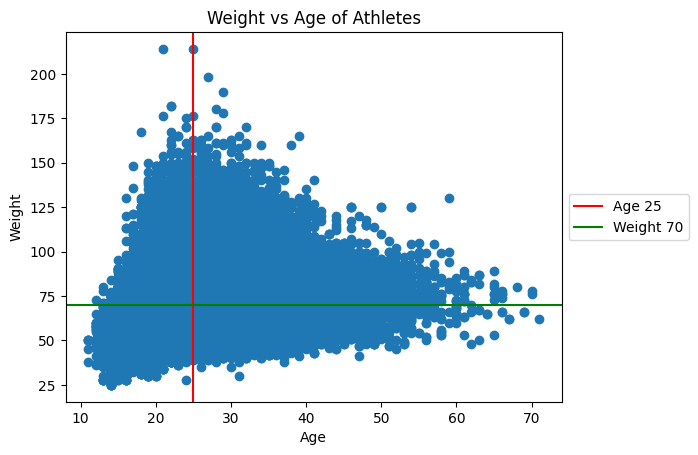

In [5]:
#preparing the dataframe
weight_age_data = athletes.dropna(subset=['Age', 'Weight'])

#plotting
plt.scatter(weight_age_data.Age, weight_age_data.Weight)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Weight vs Age of Athletes')

#Adding the vertical line at age 25 to split "younger" vs "older" athletes
plt.axvline(x=25, color='red', label='Age 25')


#Adding the horizontal line at weight=70 to mark a reference threshold
plt.axhline(y=70, color='green', label='Weight 70')

plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.show()

#### 5. __Generate a figure with four subplots arranged in a 2x2 grid. Each subplot should display a scatter plot of athlete height (y-axis) versus weight (x-axis), using data filtered for a specific sport. The sports to be shown in the subplots are: Athletics, Gymnastics, Swimming, Cycling.__

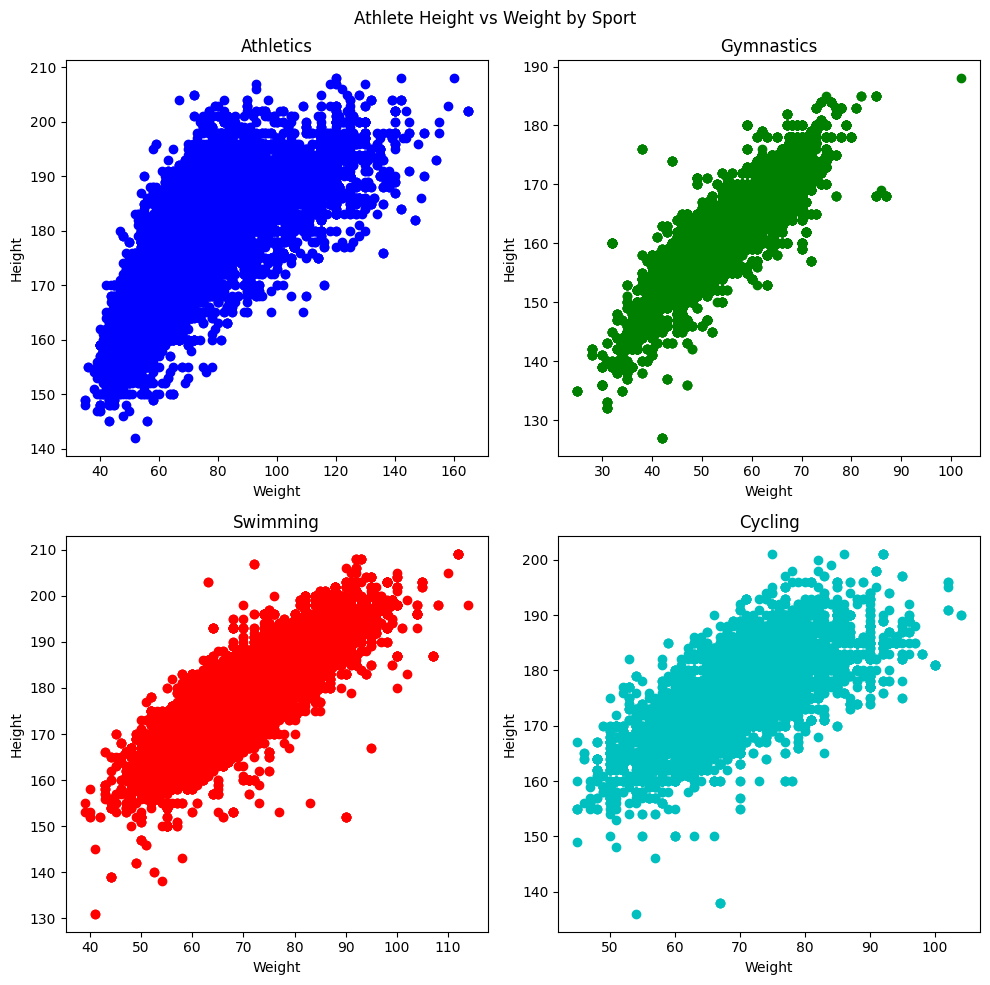

In [6]:
#preparing the dataframes
sports = ['Athletics', 'Gymnastics', 'Swimming', 'Cycling']
colors = ['b', 'g', 'r', 'c']
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

#plotting
for i, sport in enumerate(sports):
    ax = axs[i // 2, i % 2]
    sport_data = athletes[athletes['Sport'] == sport]
    ax.scatter(sport_data['Weight'], sport_data['Height'], c=colors[i])
    ax.set_xlabel('Weight')
    ax.set_ylabel('Height')
    ax.set_title(sport)

plt.suptitle('Athlete Height vs Weight by Sport')
plt.tight_layout()
plt.show()



#### 6. __Plot two line graphs of number of athletes per year and average height per year on the same plot. Use left y-axis for count, right y-axis for average height. Label both axes clearly.__

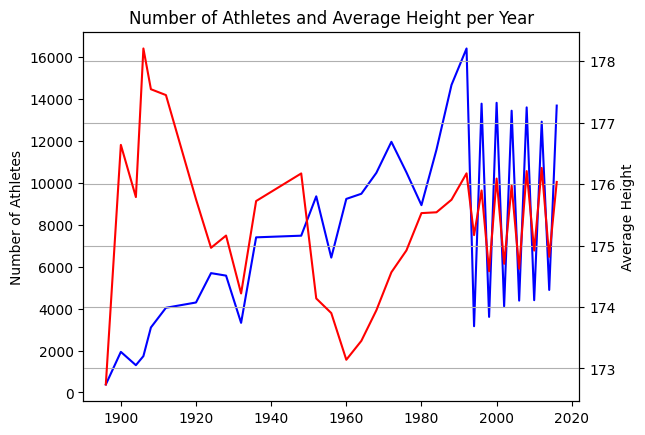

In [7]:
#preparing the dataframe
athletes_per_year = athletes.groupby('Year').size()
average_height_per_year = athletes.groupby('Year')['Height'].mean()

fig, axes_1 = plt.subplots()

axes_2 = axes_1.twinx()

#plotting
axes_1.plot(athletes_per_year.index, athletes_per_year.values, color="blue")
axes_1.set_ylabel('Number of Athletes')

axes_2.plot(average_height_per_year.index, average_height_per_year.values, color="red")
axes_2.set_ylabel('Average Height')

plt.xlabel('Year')
plt.title('Number of Athletes and Average Height per Year')
plt.grid(axis="y")

plt.show()


## **SECTION TWO: Seaborn**

In [8]:
#importing the library
import seaborn as sns

#### 1. __Show height distribution by gender using a boxplot. Use hue to split by gender.__

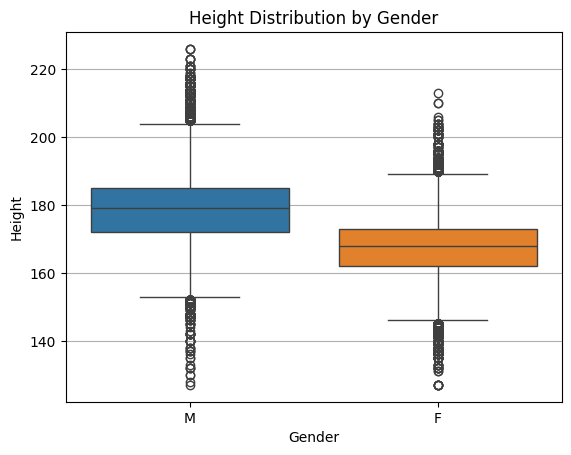

In [9]:
#prepare the dataframe
height_by_gender = athletes.dropna(subset=['Height', 'Sex'])

#plotting
sns.boxplot(x='Sex', y='Height', data=height_by_gender, hue='Sex')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.title('Height Distribution by Gender')
plt.grid(axis="y")

#### 2. __Plot a histogram of athlete ages. Use bins=15__

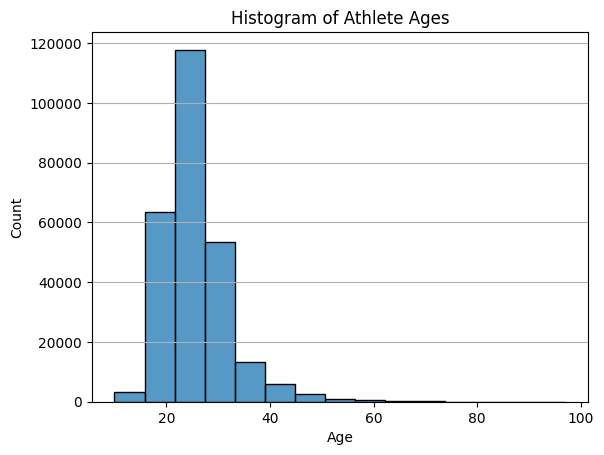

In [11]:
#preparing the dataframe
athlete_ages = athletes.dropna(subset=['Age'])

#plotting
sns.histplot(athlete_ages['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Athlete Ages')
plt.grid(axis="y")

## **SECTION THREE: Ploty**

#### 1. __Plot average height per year for 3 sports (e.g., Basketball, Volleyball, Athletics). Add interactive legend so user can select/deselect each sport.__

In [51]:
#importing the library
import plotly.express as px

#The three sports to plot
sports = ['Basketball', 'Volleyball', 'Athletics']

#preparing the dataframe
average_height_per_year = athletes.groupby(['Year', 'Sport'])['Height'].mean().reset_index()
data = average_height_per_year[average_height_per_year['Sport'].isin(sports)].dropna(subset=['Height'])

#plotting a bar chart
plot = px.bar(data, x='Year', y='Height', color='Sport', barmode='group',
             labels={'Height': 'Average Height', 'Year': 'Year', 'Sport': 'Sport'},
             title='Average Height per Year for Basketball, Volleyball, and Athletics'
             )

plot.show()

data

,Year,Sport,Height
0,1896,Athletics,174.875000
10,1900,Athletics,178.578947
30,1904,Athletics,178.227273
47,1906,Athletics,180.352941
61,1908,Athletics,178.305994
...,...,...,...
828,2012,Basketball,192.351916
853,2012,Volleyball,189.926829
873,2016,Athletics,175.207140
875,2016,Basketball,191.932384


## **SECTION FOUR: Folium**

#### 1. __Plot the locations of Kenya, Uganda, Burundi, and Rwanda on a map. Place a red marker on Kenya's location. The other countries should have grey markers.__

In [37]:
#importing the library
import folium

#creating a dataframe with location data
data = {
    'Country': ['Kenya', 'Uganda', 'Burundi', 'Rwanda'],
    'Latitude': [0.0236, -0.3152, -3.3731, -1.9403],
    'Longitude': [37.9062, 32.5816, 29.9189, 29.8739]
}
df = pd.DataFrame(data)


#plotting the map centered at E.Africa
map = folium.Map(location=[-1.0, 30.0], zoom_start=6)

#adding the markers for each country
for index, row in df.iterrows():
    color = 'red' if row['Country'] == 'Kenya' else 'gray'
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Country'],
        icon=folium.Icon(color=color)
    ).add_to(map)
map